# 1. 데이터셋 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


> Row data는 최대한 건드리지 않는 것이 좋기 때문에 copy를 진행한 후 데이터셋을 처리하기로 합니다.

In [3]:
game = df.copy()
game.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


# 2. EDA & Feature Engineering

> 시각적 탐색을 통해 'Unnamed: 0' 컬럼이 index와 중복되는 것을 확인할 수 있으므로 제거해줍니다.

In [4]:
game.drop('Unnamed: 0', axis=1, inplace=True)
game.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [5]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


> 시각적 탐색한 것과 더불어 info()를 통해 프로그래매틱 탐색으로 품질의 문제를 해결하고자 합니다.
> - Year, Genre, Publisher 컬럼에 missing value가 있는 것을 확인할 수 있으므로 대체하거나 제거해줍니다.
> - Year 컬럼이 연도로 확인되지만 float type인 것을 알 수 있으므로 int type으로 변경해줍니다.
> - Sales 컬럼들이 연속적인 변수므로 object type이 아닌 적절한 type으로 변경해줍니다.

## 2-1. 중복 데이터 확인 및 제거

In [6]:
# 중복된 데이터 확인 duplicated의 keep를 False로 설정해줘서 중복되는 데이터를 확인한다.
game[game.duplicated(keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [7]:
# 중복된 데이터 제거
game.drop_duplicates(inplace=True)

# 인덱스 재정렬
game = game.reset_index(drop=True)

# 중복된 데이터가 제거되었는지 확인
game[game.duplicated(keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


## 2-2. 결측치 처리

In [8]:
# 결측치 확인
game.isnull().sum()

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

> 여러 결측치가 확인되었지만 이 결측치를 함부로 대체하는 것은 여러 문제를 야기할 수 있습니다.
> - 결측치를 다 제거했을 경우 데이터의 손실과 함께 신뢰도가 낮아질 수 있습니다.
> - 결측치를 잘못 대체했을 경우 데이터의 편향이 생길 수 있습니다.  
> - 그렇기에 결측치에 해당하는 데이터들이 전체 데이터에 얼마나 영향을 주는지 알기 위해서 분석을 통해 결측치를 처리합니다.

In [9]:
# 전체 데이터에 대한 각 컬럼의 결측치 비율
(game.isnull().sum() / len(game)) * 100

Name           0.000000
Platform       0.000000
Year           1.626800
Genre          0.301259
Publisher      0.349461
NA_Sales       0.000000
EU_Sales       0.000000
JP_Sales       0.000000
Other_Sales    0.000000
dtype: float64

In [10]:
game[game.Publisher.isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
1313,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0,0
1560,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0,0
1789,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0,0
1879,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,NaN,0,0,0.05,0
1961,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0,0.01
2070,World of Tanks,X360,NaN,Shooter,NaN,0,0.03,0,0
2970,Chou Soujuu Mecha MG,DS,NaN,Simulation,NaN,0,0,0.06,0
3184,Action Man-Operation Extreme,PS,NaN,Action,NaN,0.05,0.03,0,0.01
3412,Dance with Devils,PSV,2016.0,Action,NaN,0,0,0.01,0


#### Year
> - Year 컬럼의 missing value(결측치)가 적은 비율이지만 알고자 하는 '연도별 게임의 트렌드'에 어느정도 영향이 있을 수도 있습니다.
> - 하지만 이것을 평균이나 중위값으로 대체하는 것은 자료의 편향성을 가져다줄 수도 있고 특성들간의 상관관계를 왜곡할 수도 있기 때문에 완벽한 방법은 아니라 판단됩니다.
> - 또한 다른 컬럼을 참고하여 연도를 예측하서 대체하는 것도 어려워보이기 때문에 다른 값으로 대체하지않고 제거합니다.
#### Genre
> - Genre 컬럼의 missing value도 Year 컬럼과 마찬가지로 다른 컬럼을 참고하여 예측해서 대체하는 것이 어려워보이기 때문에 다른 값으로 대체하지않고 제거합니다.
#### Publisher
> - Publisher 컬럼는 Platform 컬럼에서 공통적인 요소를 발견해 검색으로 정보를 찾아봤습니다.
> - 대부분의 결측치들은 연도를 알 수 없거나 GBA 일명 게임보이 어드밴스라는 플랫폼으로 출시이후 2004년 닌텐도 DS의 발매로 세대교체가 되었거나 서비스를 종료한 것으로 파악이 됩니다.
> - 저희가 개발할 게임은 최신 자료를 바탕으로 설계할 예정이기 때문에 과거의 데이터는 불필요하다고 판단됩니다.
> - 그렇기에 다른 값으로 대체하지않고 제거하도록 합니다.

In [11]:
# Year & Genre 컬럼 결측치 제거
game = game.dropna(subset=['Year', 'Genre', 'Publisher'])

# 인덱스 재정렬
game = game.reset_index(drop=True)

# 두 컬럼에 대해 결측치가 제거되었는지 확인
game.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

## 2-3. Year Column

In [12]:
game.Year.value_counts()

2009.0    1418
2008.0    1413
2010.0    1246
2007.0    1192
2011.0    1123
          ... 
13.0         2
12.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, Length: 62, dtype: int64

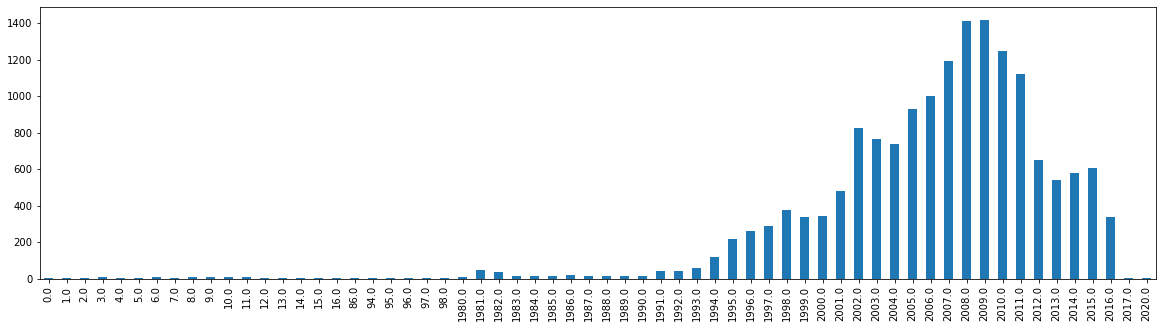

In [13]:
year_value_counts = game.Year.value_counts(dropna=False).sort_index()
year_value_counts.plot(kind='bar', figsize=(20,5));

> - 먼저 연도의 data type이 int type이 아닌 float type인 것을 확인했고 이를 올바른 type으로 바꿔줍니다.

In [14]:
# float -> int 변경
game = game.astype({'Year' : 'int'})

> - value_counts()로 Year 컬럼을 살펴본 결과 연도가 아닌 숫자를 확인할 수 있습니다. 
> - 연도가 아닌 숫자의 Game name을 검색해보니 20 미만은 2000년도를 뜻하고 20 초과 100 미만는 1900년도인 것을 확인했습니다. 
> - 이 정보를 바탕으로 연도를 수정해줍니다.

In [15]:
# 함수를 통해 올바르지 않은 연도 수정
def convert(year_value):
    if year_value < 20:
        year_value += 2000
    elif (year_value > 20) & (year_value < 100):
        year_value += 1900
    return year_value

In [16]:
# Year 컬럼 함수 적용
game.Year = game.Year.apply(convert)

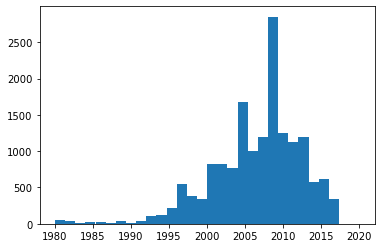

In [17]:
plt.hist(game.Year, bins=30);

> - value_counts()와 histogram을 통해 알 수 있듯이 대부분의 게임이 1995년부터 2016년에 만들어진 것을 확인할 수 있습니다.
> - 그렇기에 1995년부터 2016년에 만들어진 게임의 비율이 전체 데이터를 얼마나 차지하는지 확인하고 나머지 연도를 이상치라 간주하고 제거합니다.

In [18]:
# 1995년부터 2016년까지 만들어진 게임의 비율
outlier = game.query('(Year >= 1995) and (Year <= 2016)')
len(outlier)/len(game)

0.9698910165630196

In [19]:
# 이상치를 제거한 데이터프레임 저장 후 인덱스 재정렬
game = outlier.reset_index(drop=True)

## 2-4. Sales Column

> - Sales 컬럼은 인구수에 따른 출고량입니다.
> - 프로그래매틱 탐색을 통해 알아본 결과 Country_Sales 컬럼이 object type인 것을 확인할 수 있었습니다.
> - sample()로 몇가지 확인해본 결과 십의 자리수나 백의 자리수는 "K", 소수점은 "M" 문자가 하나씩 포함이 되어 있습니다.
> - 이것은 인구수에 따른 출고량인 것으로 미루어보아 K = 1,000, M = 1,000,000 인 것으로 파악되어 M(Million)으로 치환해서 계산합니다.

In [20]:
# K와 M을 치환해줌과 동시에 map(pd.eval)을 이용해 사칙연산과 type 변경이 이루어집니다. 
game.NA_Sales = game.NA_Sales.replace({'K' : '*0.001', 'M' : ''}, regex=True).map(pd.eval)
game.EU_Sales = game.EU_Sales.replace({'K' : '*0.001', 'M' : ''}, regex=True).map(pd.eval)
game.JP_Sales = game.JP_Sales.replace({'K' : '*0.001', 'M' : ''}, regex=True).map(pd.eval)
game.Other_Sales = game.Other_Sales.replace({'K' : '*0.001', 'M' : ''}, regex=True).map(pd.eval)

In [21]:
# 수정사항이 잘 적용되었는지 확인
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15752 entries, 0 to 15751
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         15752 non-null  object 
 1   Platform     15752 non-null  object 
 2   Year         15752 non-null  int64  
 3   Genre        15752 non-null  object 
 4   Publisher    15752 non-null  object 
 5   NA_Sales     15752 non-null  float64
 6   EU_Sales     15752 non-null  float64
 7   JP_Sales     15752 non-null  float64
 8   Other_Sales  15752 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


### 2-4-1. Sales Column Feature Engineering

> - '출고량이 높은 게임에 대한 분석 및 시각화 프로세스'를 처리하기 위해 모든 지역에 대한 Total_Sales가 필요하기 때문에 feature engineering을 진행해줍니다.

In [22]:
game['Total_Sales'] = game.NA_Sales + game.EU_Sales + game.JP_Sales + game.Other_Sales
game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
15747,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
15748,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
15749,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
15750,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


#### EDA와 Feature Engineering을 마친 데이터셋

In [23]:
game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
15747,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
15748,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
15749,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
15750,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


# 3. 연도별 게임의 트랜드(시각화)

> 연도별 게임의 트렌드는 여러 방향으로 분석이 가능합니다.
> 1. 연도별 가장 많은 출고량을 보이는 게임 장르
> 2. 연도별 가장 많은 출고량을 보이는 게임 플랫폼
> 3. 연도별 가장 많은 출고량을 보이는 게임 회사

## 4-1. 연도별 가장 많은 출고량을 보이는 game genre

In [24]:
year_list, genre_list, sales_list = [], [], []

for year in range(1995, 2017):
    year_genre=game[game.Year == year].groupby(['Year', 'Genre']).sum().sort_values(by='Total_Sales', ascending=False).reset_index()
    year_list.append(year_genre.Year.iloc[0])
    genre_list.append(year_genre.Genre.iloc[0])
    sales_list.append(year_genre.Total_Sales.iloc[0])

year_genre_dct = {'Year' : year_list,
                  'Genre' : genre_list,
                  'Total_Sales' : sales_list}
year_best_genre = pd.DataFrame(year_genre_dct)
year_best_genre

,Year,Genre,Total_Sales
0,1995,Platform,16.69
1,1996,Role-Playing,43.99
2,1997,Racing,31.92
3,1998,Sports,41.75
4,1999,Role-Playing,47.24
5,2000,Sports,41.24
6,2001,Action,56.68
7,2002,Action,86.65
8,2003,Action,67.98
9,2004,Action,76.15


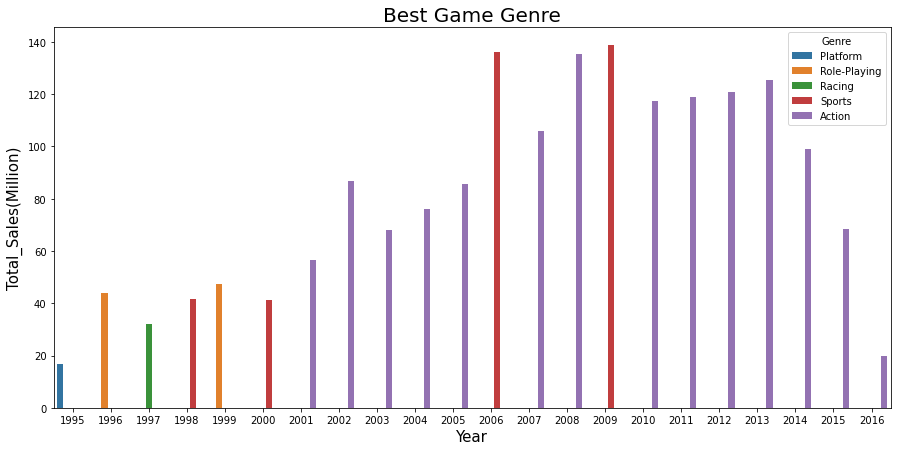

In [25]:
plt.figure(figsize=(15,7))
best_genre = sns.barplot(x='Year', y='Total_Sales', data=year_best_genre, hue='Genre', errwidth=0)
best_genre.set_title('Best Game Genre', fontsize=20)
best_genre.set_xlabel('Year', fontsize=15)
best_genre.set_ylabel('Total_Sales(Million)', fontsize=15);

# 4. 지역에 따라서 선호하는 게임 장르(시각화)

> 지역에 따라서 선호하는 게임 장르가 다를까?

> - 각 지역에 따른 선호하는 게임 장르를 파악하고 전체 선호 게임 장르를 파악합니다.
> - 지역에 따라서 선호하는 게임 장르가 왜 다른가를 조사합니다.
> - 아마 플랫폼이 만들어진 곳에 대한 것이거나 자회사가 그 지역에 있거나 일수도 있을 것 같습니다.

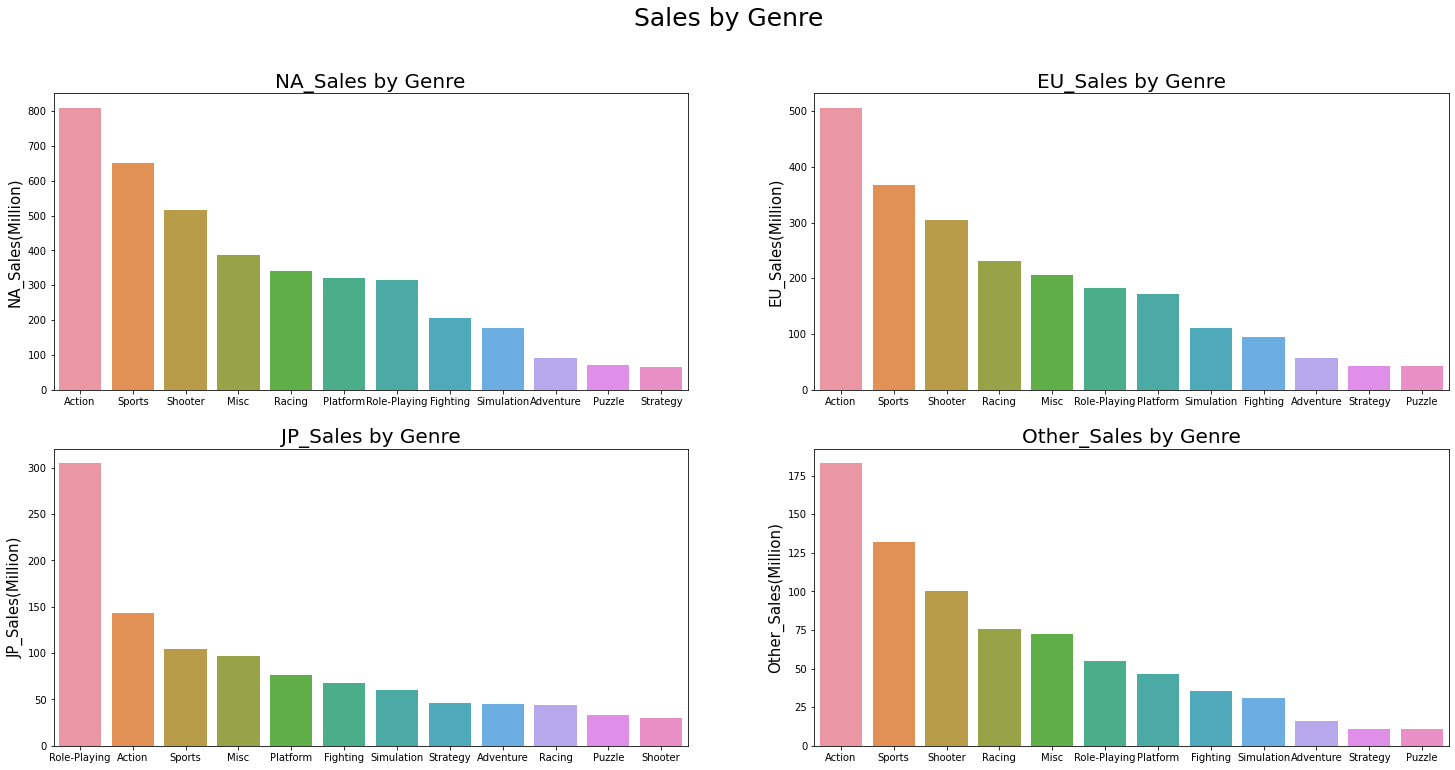

In [26]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(25,12))
fig.suptitle('Sales by Genre', fontsize=25)

# Genre에 따른 NA_Sales
na_sales_by_genre = game.groupby(['Genre']).sum().sort_values(by='NA_Sales', ascending=False).reset_index()
na_genre = sns.barplot(x='Genre', y='NA_Sales', data=na_sales_by_genre, errwidth=0, ax=ax[0,0])
na_genre.set_title('NA_Sales by Genre', fontsize=20)
na_genre.set_xlabel('')
na_genre.set_ylabel('NA_Sales(Million)', fontsize=15);


# Genre에 따른 EU_sales
eu_sales_by_genre = game.groupby(['Genre']).sum().sort_values(by='EU_Sales', ascending=False).reset_index()
eu_genre = sns.barplot(x='Genre', y='EU_Sales', data=eu_sales_by_genre, errwidth=0, ax=ax[0,1])
eu_genre.set_title('EU_Sales by Genre', fontsize=20)
eu_genre.set_xlabel('')
eu_genre.set_ylabel('EU_Sales(Million)', fontsize=15);


# Genre에 따른 JP_Saels
jp_sales_by_genre = game.groupby(['Genre']).sum().sort_values(by='JP_Sales', ascending=False).reset_index()
jp_genre = sns.barplot(x='Genre', y='JP_Sales', data=jp_sales_by_genre, errwidth=0, ax=ax[1,0])
jp_genre.set_title('JP_Sales by Genre', fontsize=20)
jp_genre.set_xlabel('')
jp_genre.set_ylabel('JP_Sales(Million)', fontsize=15);


# Genre에 따른 Other_Sales
other_sales_by_genre = game.groupby(['Genre']).sum().sort_values(by='Other_Sales', ascending=False).reset_index()
other_genre = sns.barplot(x='Genre', y='Other_Sales', data=other_sales_by_genre, errwidth=0, ax=ax[1,1])
other_genre.set_title('Other_Sales by Genre', fontsize=20)
other_genre.set_xlabel('')
other_genre.set_ylabel('Other_Sales(Million)', fontsize=15);

## Total_Sales

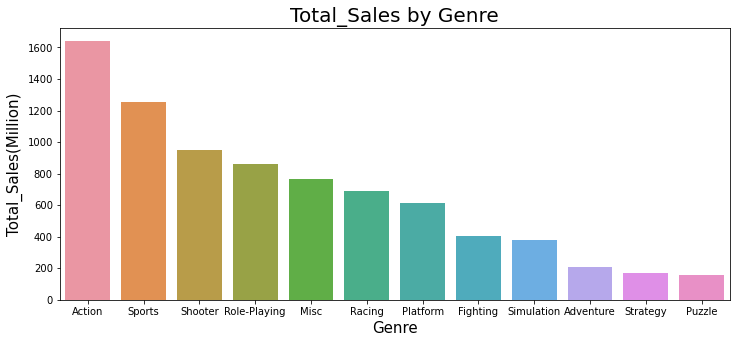

In [27]:
# Genre에 따른 Total_Sales
total_sales_by_genre = game.groupby(['Genre']).sum().sort_values(by='Total_Sales', ascending=False).reset_index()

plt.figure(figsize=(12,5))
total_genre = sns.barplot(x='Genre', y='Total_Sales', data=total_sales_by_genre, errwidth=0)
total_genre.set_title('Total_Sales by Genre', fontsize=20)
total_genre.set_xlabel('Genre', fontsize=15)
total_genre.set_ylabel('Total_Sales(Million)', fontsize=15);

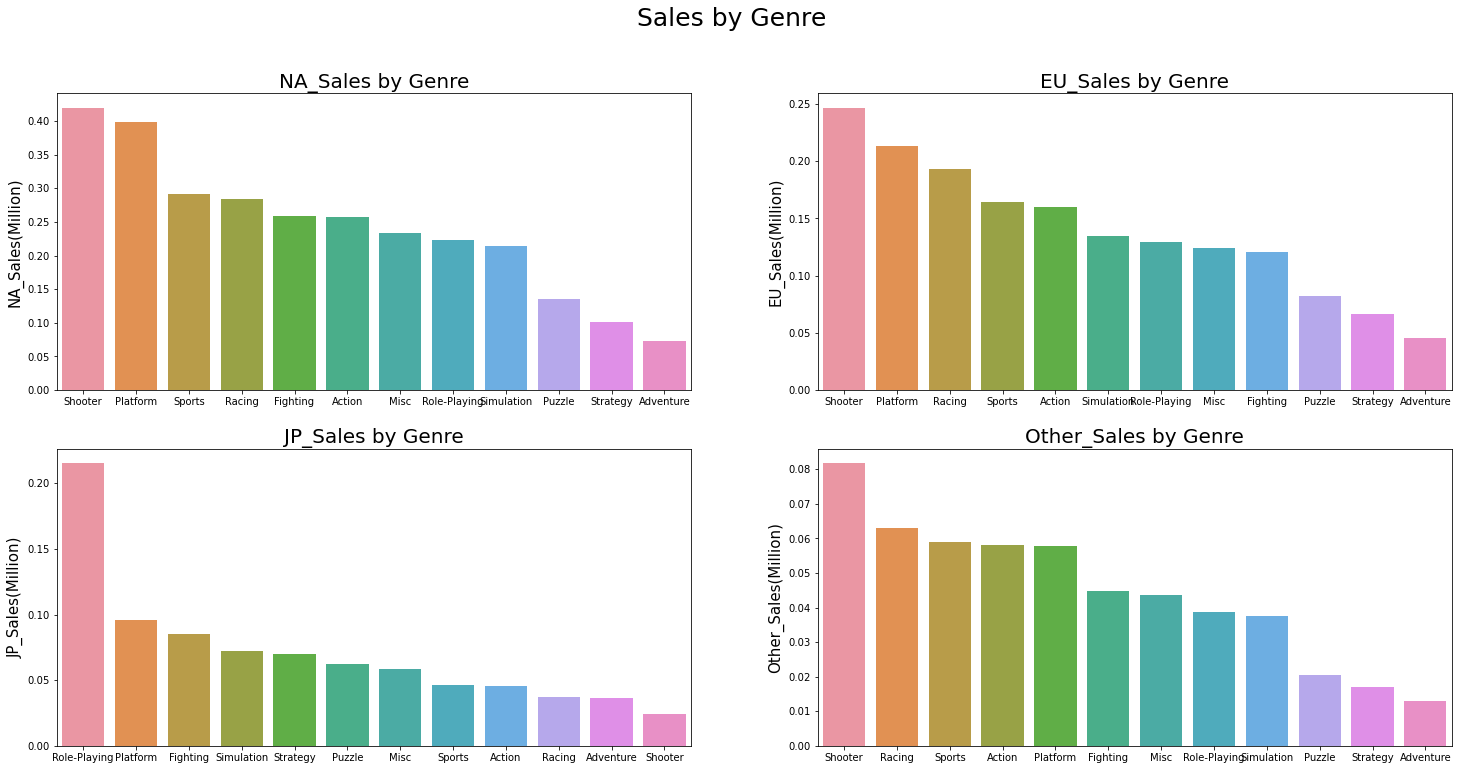

In [28]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(25,12))
fig.suptitle('Sales by Genre', fontsize=25)

# Genre에 따른 NA_Sales
na_sales_by_genre = game.groupby(['Genre']).mean().sort_values(by='NA_Sales', ascending=False).reset_index()
na_genre = sns.barplot(x='Genre', y='NA_Sales', data=na_sales_by_genre, errwidth=0, ax=ax[0,0])
na_genre.set_title('NA_Sales by Genre', fontsize=20)
na_genre.set_xlabel('')
na_genre.set_ylabel('NA_Sales(Million)', fontsize=15);


# Genre에 따른 EU_sales
eu_sales_by_genre = game.groupby(['Genre']).mean().sort_values(by='EU_Sales', ascending=False).reset_index()
eu_genre = sns.barplot(x='Genre', y='EU_Sales', data=eu_sales_by_genre, errwidth=0, ax=ax[0,1])
eu_genre.set_title('EU_Sales by Genre', fontsize=20)
eu_genre.set_xlabel('')
eu_genre.set_ylabel('EU_Sales(Million)', fontsize=15);


# Genre에 따른 JP_Saels
jp_sales_by_genre = game.groupby(['Genre']).mean().sort_values(by='JP_Sales', ascending=False).reset_index()
jp_genre = sns.barplot(x='Genre', y='JP_Sales', data=jp_sales_by_genre, errwidth=0, ax=ax[1,0])
jp_genre.set_title('JP_Sales by Genre', fontsize=20)
jp_genre.set_xlabel('')
jp_genre.set_ylabel('JP_Sales(Million)', fontsize=15);


# Genre에 따른 Other_Sales
other_sales_by_genre = game.groupby(['Genre']).mean().sort_values(by='Other_Sales', ascending=False).reset_index()
other_genre = sns.barplot(x='Genre', y='Other_Sales', data=other_sales_by_genre, errwidth=0, ax=ax[1,1])
other_genre.set_title('Other_Sales by Genre', fontsize=20)
other_genre.set_xlabel('')
other_genre.set_ylabel('Other_Sales(Million)', fontsize=15);

## Mean_Sales

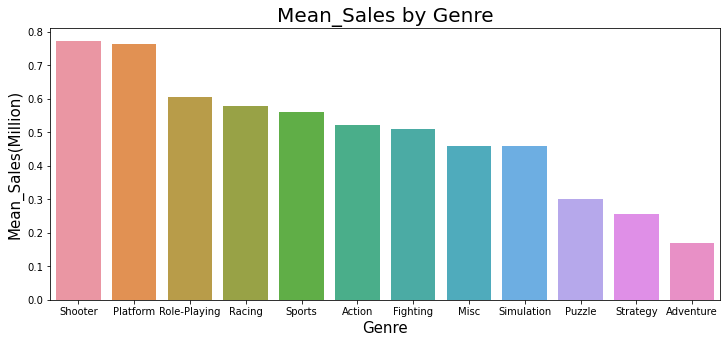

In [29]:
# Genre에 따른 Total_Sales
total_sales_by_genre = game.groupby(['Genre']).mean().sort_values(by='Total_Sales', ascending=False).reset_index()


plt.figure(figsize=(12,5))
total_genre = sns.barplot(x='Genre', y='Total_Sales', data=total_sales_by_genre, errwidth=0)
total_genre.set_title('Mean_Sales by Genre', fontsize=20)
total_genre.set_xlabel('Genre', fontsize=15)
total_genre.set_ylabel('Mean_Sales(Million)', fontsize=15);

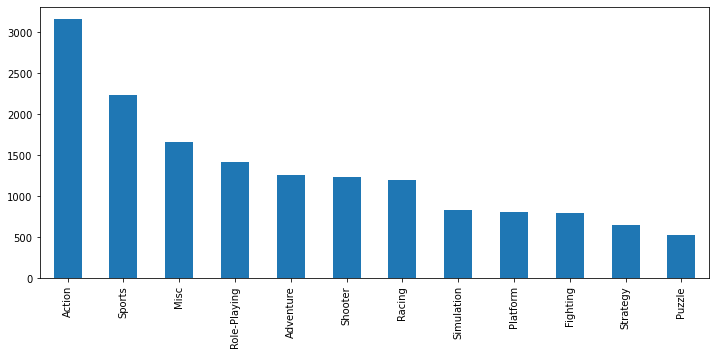

In [30]:
# 각 게임 장르가 몇 개나 있는지 확인
game.Genre.value_counts().plot(kind='bar', figsize=(12,5));

shooter 장르의 게임이 platform 장르의 게임보다 많이 만들어졌음에도 불구하고 총 매출액 평균이 얼마 차이나지 않은 것으로 보아 저희는 platform 장르의 게임이 더 안정적인 매출을 보유할 것으로 예상이 됩니다.   
이것을 가설검정을 통해 알아보고자 합니다.

## 가설검정

H0 : Shooter Genre 총 매출 평균 >= Platform Genre 총 매출 평균    
H1 : Shooter Genre 총 매출 평균 < Platform Genre 총 매출 평균

In [31]:
total_mean = game.Total_Sales.mean()
total_mean

0.5139728288471552

In [32]:
shooter_total_sales = np.array(game[game.Genre=='Shooter'].Total_Sales)

In [33]:
shooter_of_1000 = []

np.random.seed(10)

for i in range(10000):
    shooter = np.random.choice(shooter_total_sales, 1000, replace=True)
    shooter_of_1000.append(shooter.mean())

shooter_lower, shooter_upper = np.percentile(shooter_of_1000, 2.5), np.percentile(shooter_of_1000, 97.5)

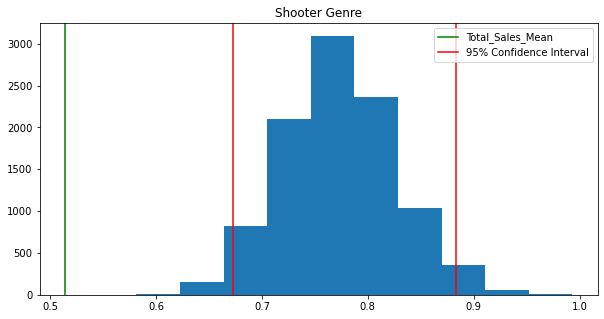

In [34]:
plt.figure(figsize=(10,5))
plt.title('Shooter Genre')
plt.hist(shooter_of_1000)
plt.axvline(x=total_mean, c='green', label='Total_Sales_Mean')
plt.axvline(shooter_lower, c='red', label='95% Confidence Interval')
plt.axvline(shooter_upper, c='red')
plt.legend();

In [35]:
platform_total_sales = np.array(game[game.Genre=='Platform'].Total_Sales)

In [36]:
platform_of_1000 = []

np.random.seed(10)

for i in range(10000):
    platform = np.random.choice(platform_total_sales, 1000, replace=True)
    platform_of_1000.append(platform.mean())
    
platform_lower, platform_upper = np.percentile(platform_of_1000, 2.5), np.percentile(platform_of_1000, 97.5)

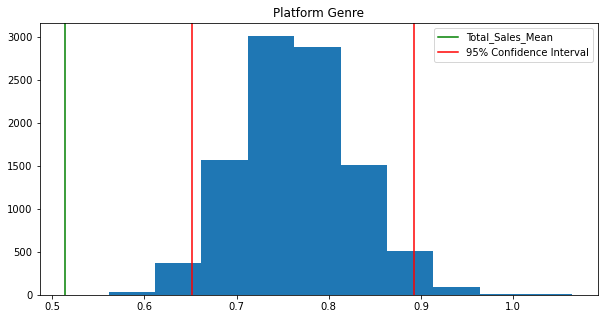

In [37]:
plt.figure(figsize=(10,5))
plt.hist(platform_of_1000)
plt.title('Platform Genre')
plt.axvline(x=total_mean, c='green', label='Total_Sales_Mean')
plt.axvline(platform_lower, c='red', label='95% Confidence Interval')
plt.axvline(platform_upper, c='red');
plt.legend();

In [38]:
platform_of_1000 = []
shooter_of_1000 = []
diff_mean = []

np.random.seed(10)

for i in range(10000):
    platform = np.random.choice(platform_total_sales, 1000, replace=True)
    platform_of_1000.append(platform.mean())
    shooter = np.random.choice(shooter_total_sales, 1000, replace=True)
    shooter_of_1000.append(shooter.mean())
    
    diff_mean.append(platform.mean() - shooter.mean())

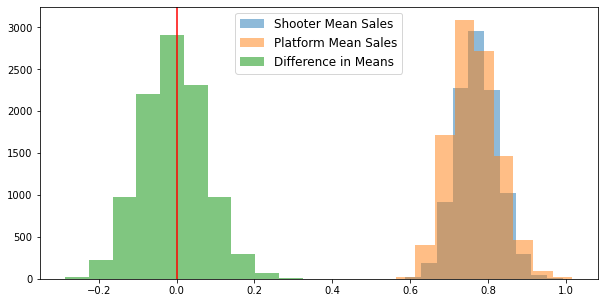

In [39]:
plt.figure(figsize=(10,5))
plt.hist(shooter_of_1000, alpha=0.5, label='Shooter Mean Sales')
plt.hist(platform_of_1000, alpha=0.5, label='Platform Mean Sales')

plt.hist(diff_mean, alpha=0.6, label='Difference in Means')
plt.axvline(0, c='r')
plt.legend(loc=9, fontsize=12)
plt.show();

### 4-1.1 연도별 north america 지역에 가장 많은 출고량을 보이는 장르

In [40]:
year_list, genre_list, sales_list = [], [], []

for year in range(1995, 2017):
    year_na_genre=game[game.Year == year].groupby(['Year', 'Genre']).sum().sort_values(by='NA_Sales', ascending=False).reset_index()
    year_list.append(year_na_genre.Year.iloc[0])
    genre_list.append(year_na_genre.Genre.iloc[0])
    sales_list.append(year_na_genre.NA_Sales.iloc[0])

year_na_genre_dct = {'Year' : year_list,
                  'Genre' : genre_list,
                  'NA_Sales' : sales_list}
year_na_best_genre = pd.DataFrame(year_na_genre_dct)

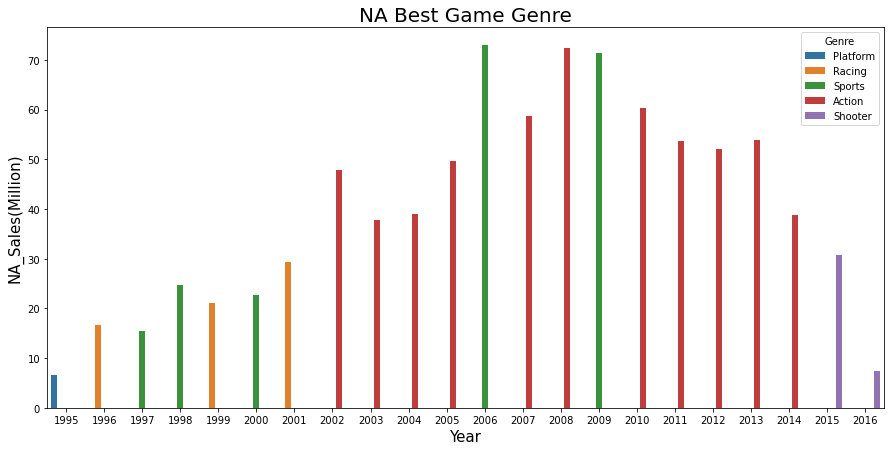

In [41]:
plt.figure(figsize=(15,7))
best_genre = sns.barplot(x='Year', y='NA_Sales', data=year_na_best_genre, hue='Genre', errwidth=0)
best_genre.set_title('NA Best Game Genre', fontsize=20)
best_genre.set_xlabel('Year', fontsize=15)
best_genre.set_ylabel('NA_Sales(Million)', fontsize=15);

> NA 지역의 연도별 가장 많은 출고량을 보이는 장르를 살펴보면 전체 지역의 연도별 가장 많은 출고량을 보이는 장르와 거의 비슷한 것을 확인할 수 있습니다.     
> 또한 NA 지역의 출고량이 전체 출고량의 절반 정도를 차지하는 것을 또한번 확인할 수 있습니다.

## 4-2. 연도별 가장 많은 출고량을 보이는 game platform

In [42]:
year_list, platform_list, sales_list = [], [], []

for year in range(1995, 2017):
    year_platform=game[game.Year == year].groupby(['Year', 'Platform']).sum().sort_values(by='Total_Sales', ascending=False).reset_index()
    year_list.append(year_platform.Year.iloc[0])
    platform_list.append(year_platform.Platform.iloc[0])
    sales_list.append(year_platform.Total_Sales.iloc[0])

year_platform_dct = {'Year' : year_list,
                  'Platform' : platform_list,
                  'Total_Sales' : sales_list}
year_best_platform = pd.DataFrame(year_platform_dct)
year_best_platform

,Year,Platform,Total_Sales
0,1995,PS,35.96
1,1996,PS,94.28
2,1997,PS,136.17
3,1998,PS,169.49
4,1999,PS,142.57
5,2000,PS,96.35
6,2001,PS2,163.73
7,2002,PS2,205.38
8,2003,PS2,184.31
9,2004,PS2,210.47


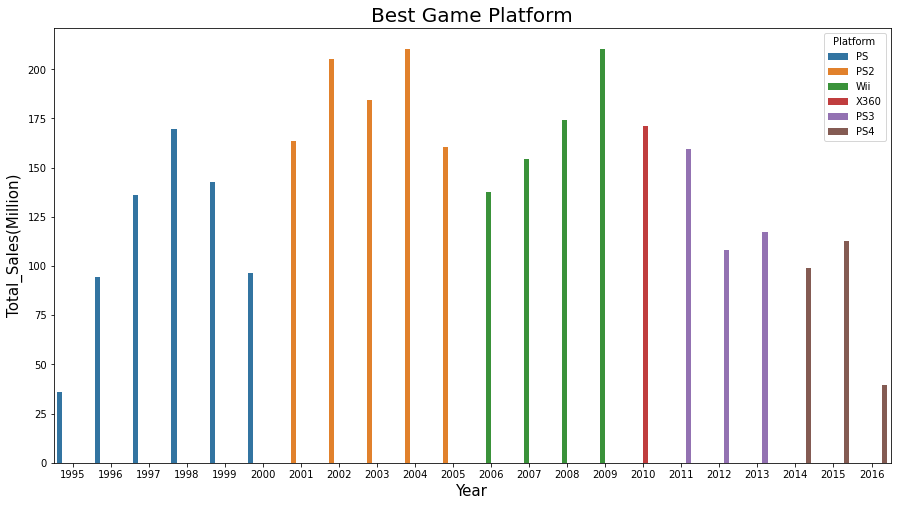

In [43]:
plt.figure(figsize=(15,8))
best_platform = sns.barplot(x='Year', y='Total_Sales', data=year_best_platform, hue='Platform', errwidth=0)
best_platform.set_title('Best Game Platform', fontsize=20)
best_platform.set_xlabel('Year', fontsize=15)
best_platform.set_ylabel('Total_Sales(Million)', fontsize=15);

## 4-3. 연도별 가장 많은 출고량을 보이는 publisher

In [44]:
year_list, publisher_list, sales_list = [], [], []

for year in range(1995, 2017):
    year_publisher=game[game.Year == year].groupby(['Year', 'Publisher']).sum().sort_values(by='Total_Sales', ascending=False).reset_index()
    year_list.append(year_publisher.Year.iloc[0])
    publisher_list.append(year_publisher.Publisher.iloc[0])
    sales_list.append(year_publisher.Total_Sales.iloc[0])

year_publisher_dct = {'Year' : year_list,
                  'Publisher' : publisher_list,
                  'Total_Sales' : sales_list}
year_best_publisher = pd.DataFrame(year_publisher_dct)
year_best_publisher

,Year,Publisher,Total_Sales
0,1995,Sony Computer Entertainment,18.49
1,1996,Nintendo,73.69
2,1997,Sony Computer Entertainment,43.92
3,1998,Nintendo,47.30
4,1999,Nintendo,65.31
5,2000,Nintendo,34.02
6,2001,Nintendo,45.41
7,2002,Electronic Arts,72.27
8,2003,Electronic Arts,69.78
9,2004,Electronic Arts,62.98


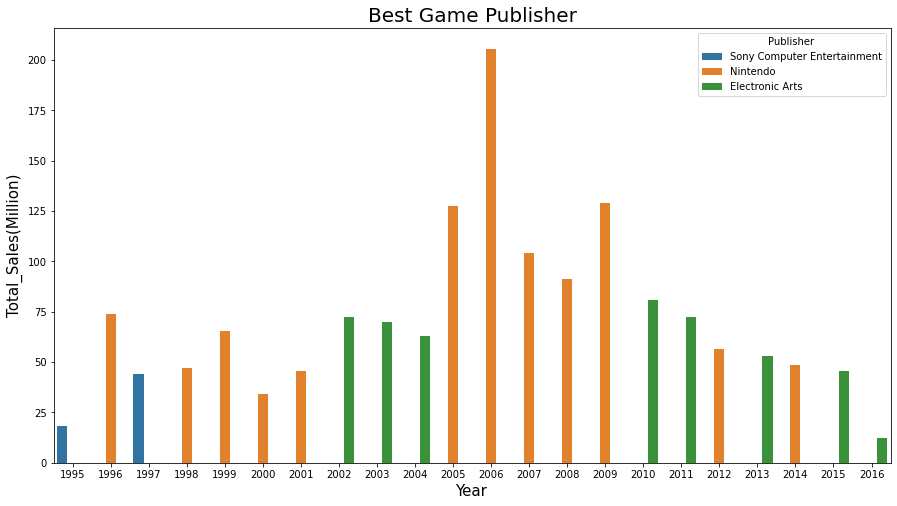

In [45]:
plt.figure(figsize=(15,8))
best_publisher = sns.barplot(x='Year', y='Total_Sales', data=year_best_publisher, hue='Publisher', errwidth=0)
best_publisher.set_title('Best Game Publisher', fontsize=20)
best_publisher.set_xlabel('Year', fontsize=15)
best_publisher.set_ylabel('Total_Sales(Million)', fontsize=15);

### 4-3-1 JP 지역의 연도별 가장 많은 출고량을 보이는 publisher

In [46]:
jp_year_list, jp_publisher_list, jp_sales_list = [], [], []

for year in range(1995, 2017):
    jp_year_publisher=game[game.Year == year].groupby(['Year', 'Publisher']).sum().sort_values(by='JP_Sales', ascending=False).reset_index()
    jp_year_list.append(jp_year_publisher.Year.iloc[0])
    jp_publisher_list.append(jp_year_publisher.Publisher.iloc[0])
    jp_sales_list.append(jp_year_publisher.JP_Sales.iloc[0])

jp_year_publisher_dct = {'Year' : jp_year_list,
                  'Publisher' : jp_publisher_list,
                  'JP_Sales' : jp_sales_list}
jp_year_best_publisher = pd.DataFrame(jp_year_publisher_dct)

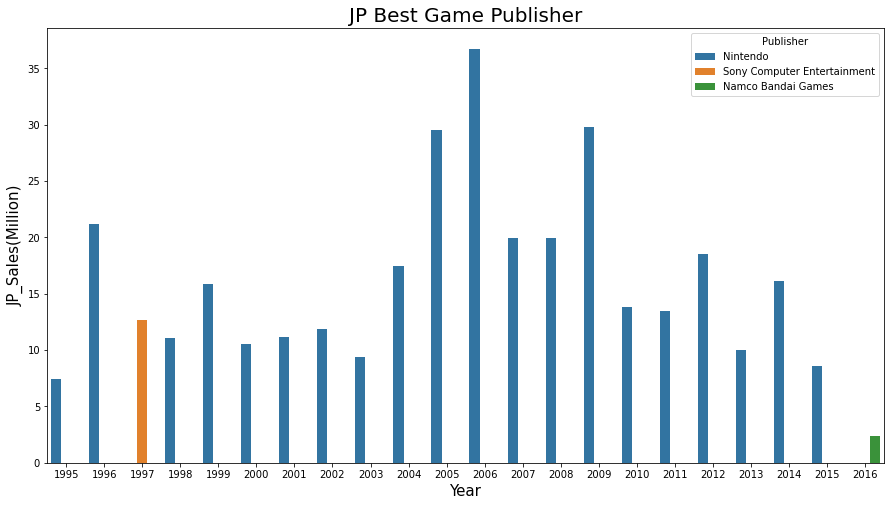

In [47]:
plt.figure(figsize=(15,8))
jp_best_publisher = sns.barplot(x='Year', y='JP_Sales', data=jp_year_best_publisher, hue='Publisher', errwidth=0)
jp_best_publisher.set_title('JP Best Game Publisher', fontsize=20)
jp_best_publisher.set_xlabel('Year', fontsize=15)
jp_best_publisher.set_ylabel('JP_Sales(Million)', fontsize=15);

### 4-3-1 NA 지역의 연도별 가장 많은 출고량을 보이는 publishe

In [48]:
na_year_list, na_publisher_list, na_sales_list = [], [], []

for year in range(1995, 2017):
    na_year_publisher=game[game.Year == year].groupby(['Year', 'Publisher']).sum().sort_values(by='NA_Sales', ascending=False).reset_index()
    na_year_list.append(na_year_publisher.Year.iloc[0])
    na_publisher_list.append(na_year_publisher.Publisher.iloc[0])
    na_sales_list.append(na_year_publisher.NA_Sales.iloc[0])

na_year_publisher_dct = {'Year' : na_year_list,
                  'Publisher' : na_publisher_list,
                  'NA_Sales' : na_sales_list}
na_year_best_publisher = pd.DataFrame(na_year_publisher_dct)

# 5. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

> - 출고량이 높은 게임은 어디 platform에서 만들어졌냐(인기있는 platform이거나 유명한 platform이거나) 
> - 어느 시기에 만들어졌냐(컴퓨터 보급 시가나 대중화 시기, 어떤 사건 등) 
> - 어느 나라에서 만들어졌냐(인구수에 따른 출고량을 고려할 수 있기 때문에)

> 가장 많은 출고량을 보유한 platform 'wii'은 2006년 출시가 되자마자 엑스박스 360, PS3와 경쟁했으며 경쟁 기종보다 늦게 출시되었음에도 굉장한 판매량을 기록하며 당대 콘솔 시장의 승자로 자리매김했다. -나무위키

> 모션 센서가 적용된 '체감혐'컨트롤러와 독창적인 액세서리를 바탕으로 마케팅 포인트를 잡았고 체감형 컨트롤러와 더불어 매년 꾸준한 출고량을 보인 스포츠 장르를 선택한 것도 성공의 한 몫을 한것으로 보인다.

In [49]:
game.sort_values('Total_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2768,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
11943,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3187,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7427,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
6576,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
2869,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
15687,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10578,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.75
10116,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.43
8951,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09


## 5-1. 1995~2016년 역대 최고 출고량 플랫폼

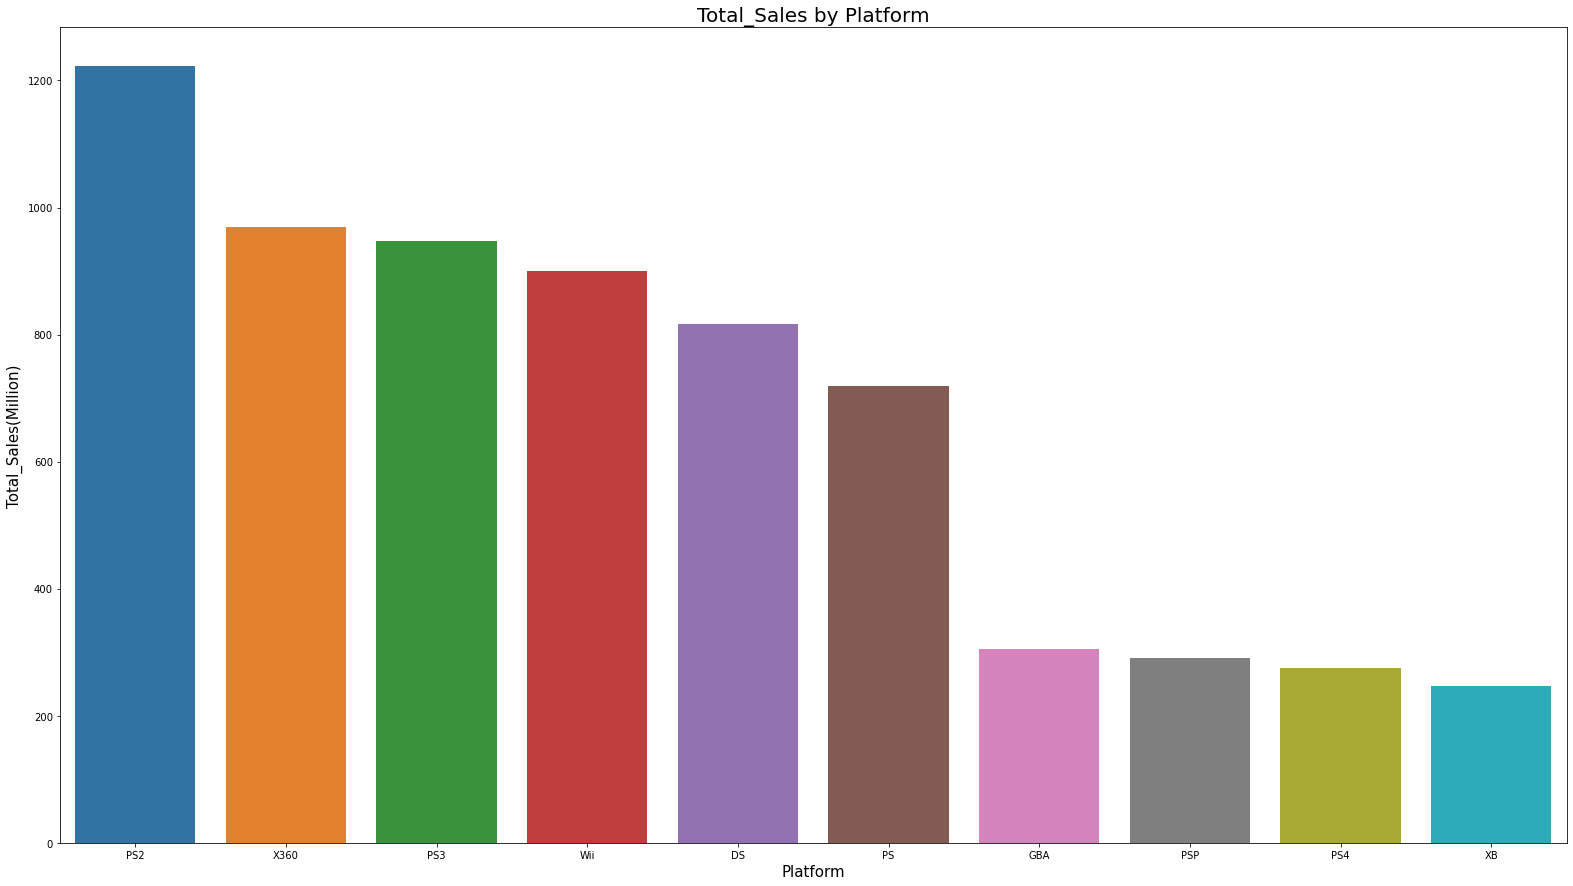

In [51]:
total_sales_by_platform = game.groupby(['Platform']).sum().sort_values(by='Total_Sales', ascending=False).reset_index()

plt.figure(figsize=(27,15))
total_platform = sns.barplot(x='Platform', y='Total_Sales', data=total_sales_by_platform.head(10), errwidth=0)
total_platform.set_title('Total_Sales by Platform', fontsize=20)
total_platform.set_xlabel('Platform', fontsize=15)
total_platform.set_ylabel('Total_Sales(Million)', fontsize=15);

#### 결론
> 장르는 플랫폼 장르 혹은 슈팅게임 장르를 선택하며 플랫폼은 플레이스테이션 플랫폼을 고려해 게임을 설계합니다.